# 数据准备

In [1]:
import pandas as pd # 数据表
df = pd.read_csv('智慧养老政策.csv', encoding='gbk')
df

,序号,标题,时效性,效力位阶,制定机关,发文字号,公布日期,施行日期,批准部门,批准日期,原文链接
0,地方规范性文件_672,黑龙江省人民政府办公厅关于推进养老服务发展的实施意见,现行有效,地方规范性文件,黑龙江省民政厅,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/b18e6be8f51692a1cbd...
1,地方规范性文件_673,广西壮族自治区大数据发展局关于全面推进数字化转型发展的意见,现行有效,地方规范性文件,广西壮族自治区大数据发展局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/22f0c8beef6908e6866...
2,地方规范性文件_674,中共无锡市委、无锡市人民政府印发《＜关于加快推进数字经济高质量发展的实施意见＞＜关于加快推进...,现行有效,地方规范性文件,无锡市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/42b6a5f466eaa99be8e...
3,地方规范性文件_675,贵阳市民政局关于推进贵阳贵安养老服务高质量发展的实施意见,现行有效,地方规范性文件,贵阳市民政局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/e67d28d08fea8084a66...
4,地方规范性文件_676,廊坊市人民政府办公室关于加快推进养老服务体系建设的实施意见,现行有效,地方规范性文件,廊坊市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/909deb5c2273a94ef8b...
...,...,...,...,...,...,...,...,...,...,...,...
2777,地方工作文件_15,郑州市人民政府关于印发郑州市数字政府建设行动方案的通知,现行有效,地方工作文件,郑州市人民政府,郑政〔2023〕25号,2023.12.25,2023.12.25,NaN,NaN,https://www.pkulaw.com/lar/b7908e42b1682d8bafd...
2778,部门规章_1,产业结构调整指导目录(2024年本),尚未施行,部门规章,国家发展和改革委员会(含原国家发展计划委员会、原国家计划委员会),中华人民共和国国家发展和改革委员会令第7号,2023.12.27,2024.02.01,NaN,NaN,https://www.pkulaw.com/chl/d8513a2dd8e4e297bdf...
2779,地方工作文件_14,山西省人民政府办公厅关于印发山西省数字政府建设规划(2023―2025年)的通知,现行有效,地方工作文件,山西省人民政府,晋政办发〔2023〕82号,2023.12.28,2023.12.28,NaN,NaN,https://www.pkulaw.com/lar/cf041968e90d5c7d666...
2780,地方工作文件_13,山东省人民政府办公厅关于印发《山东省养老服务高质量发展三年行动计划(2024—2026年)》的通知,现行有效,地方工作文件,山东省人民政府,鲁政办字〔2023〕207号,2023.12.30,2023.12.30,NaN,NaN,https://www.pkulaw.com/lar/d0f5a014d1a25e2fc83...


In [2]:
import jieba  
import pandas as pd  
import re  
  
# 定义中文标点符号列表  
chinese_punctuation = '()（）《》＜＞“”【】'  
  
# 定义预处理函数  
def preprocess_text(text):  
    # 去除标点符号  
    text = re.sub(f'[{re.escape(chinese_punctuation)}]+', '', text)  
      
    # 去除数字  
    text = re.sub(r'\d+', '', text)  
      
    # 去除指定文字  
    stopwords = ['关于', '人民政府', '印发']  
    for word in stopwords:  
        text = text.replace(word, '')  
      
    # 返回预处理后的文本  
    return text.strip()  
  
# 定义分词函数  
def tokenize_text(text):  
    # 使用jieba进行分词  
    words = jieba.lcut(text)  
    return words  
  
# 对df['标题']列中的每个文本进行预处理和分词  
tokenized_texts = [tokenize_text(preprocess_text(text)) for text in df['标题']]  
  
# 将分词结果转换为字符串，用空格分隔  
tokenized_texts_str = [' '.join(tokens) for tokens in tokenized_texts]  
  
# 将分词后的文本列表添加到df中作为新列  
df['标题分词'] = tokenized_texts_str  
  
# 打印前几行结果查看  
print(df[['标题', '标题分词']].head())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\14368\AppData\Local\Temp\jieba.cache
Loading model cost 0.751 seconds.
Prefix dict has been built successfully.


                                                  标题  \
0                         黑龙江省人民政府办公厅关于推进养老服务发展的实施意见   
1                      广西壮族自治区大数据发展局关于全面推进数字化转型发展的意见   
2  中共无锡市委、无锡市人民政府印发《＜关于加快推进数字经济高质量发展的实施意见＞＜关于加快推进...   
3                       贵阳市民政局关于推进贵阳贵安养老服务高质量发展的实施意见   
4                      廊坊市人民政府办公室关于加快推进养老服务体系建设的实施意见   

                                                标题分词  
0                       黑龙江省 办公厅 推进 养老 服务 发展 的 实施 意见  
1              广西壮族自治区 大 数据 发展局 全面 推进 数字化 转型 发展 的 意见  
2  中共 无锡市委 、 无锡市 加快 推进 数字 经济 高质量 发展 的 实施 意见 加快 推进...  
3              贵阳市 民政局 推进 贵阳 贵安 养老 服务 高质量 发展 的 实施 意见  
4                   廊坊市 办公室 加快 推进 养老 服务体系 建设 的 实施 意见  


In [3]:
df

,序号,标题,时效性,效力位阶,制定机关,发文字号,公布日期,施行日期,批准部门,批准日期,原文链接,标题分词
0,地方规范性文件_672,黑龙江省人民政府办公厅关于推进养老服务发展的实施意见,现行有效,地方规范性文件,黑龙江省民政厅,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/b18e6be8f51692a1cbd...,黑龙江省 办公厅 推进 养老 服务 发展 的 实施 意见
1,地方规范性文件_673,广西壮族自治区大数据发展局关于全面推进数字化转型发展的意见,现行有效,地方规范性文件,广西壮族自治区大数据发展局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/22f0c8beef6908e6866...,广西壮族自治区 大 数据 发展局 全面 推进 数字化 转型 发展 的 意见
2,地方规范性文件_674,中共无锡市委、无锡市人民政府印发《＜关于加快推进数字经济高质量发展的实施意见＞＜关于加快推进...,现行有效,地方规范性文件,无锡市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/42b6a5f466eaa99be8e...,中共 无锡市委 、 无锡市 加快 推进 数字 经济 高质量 发展 的 实施 意见 加快 推进...
3,地方规范性文件_675,贵阳市民政局关于推进贵阳贵安养老服务高质量发展的实施意见,现行有效,地方规范性文件,贵阳市民政局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/e67d28d08fea8084a66...,贵阳市 民政局 推进 贵阳 贵安 养老 服务 高质量 发展 的 实施 意见
4,地方规范性文件_676,廊坊市人民政府办公室关于加快推进养老服务体系建设的实施意见,现行有效,地方规范性文件,廊坊市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/909deb5c2273a94ef8b...,廊坊市 办公室 加快 推进 养老 服务体系 建设 的 实施 意见
...,...,...,...,...,...,...,...,...,...,...,...,...
2777,地方工作文件_15,郑州市人民政府关于印发郑州市数字政府建设行动方案的通知,现行有效,地方工作文件,郑州市人民政府,郑政〔2023〕25号,2023.12.25,2023.12.25,NaN,NaN,https://www.pkulaw.com/lar/b7908e42b1682d8bafd...,郑州市 郑州市 数字 政府 建设 行动 方案 的 通知
2778,部门规章_1,产业结构调整指导目录(2024年本),尚未施行,部门规章,国家发展和改革委员会(含原国家发展计划委员会、原国家计划委员会),中华人民共和国国家发展和改革委员会令第7号,2023.12.27,2024.02.01,NaN,NaN,https://www.pkulaw.com/chl/d8513a2dd8e4e297bdf...,产业 结构调整 指导 目录 年本
2779,地方工作文件_14,山西省人民政府办公厅关于印发山西省数字政府建设规划(2023―2025年)的通知,现行有效,地方工作文件,山西省人民政府,晋政办发〔2023〕82号,2023.12.28,2023.12.28,NaN,NaN,https://www.pkulaw.com/lar/cf041968e90d5c7d666...,山西省 办公厅 山西省 数字 政府 建设 规划 ― 年 的 通知
2780,地方工作文件_13,山东省人民政府办公厅关于印发《山东省养老服务高质量发展三年行动计划(2024—2026年)》的通知,现行有效,地方工作文件,山东省人民政府,鲁政办字〔2023〕207号,2023.12.30,2023.12.30,NaN,NaN,https://www.pkulaw.com/lar/d0f5a014d1a25e2fc83...,山东省 办公厅 山东省 养老 服务 高质量 发展 三年 行动计划 — 年 的 通知


# 词向量模型

In [4]:
from gensim.test.utils import common_texts
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [5]:
corpus = df['标题分词'].apply(lambda x: x.split()).tolist() # 切分词语
for document in corpus[:5]:
    print(document)

['黑龙江省', '办公厅', '推进', '养老', '服务', '发展', '的', '实施', '意见']
['广西壮族自治区', '大', '数据', '发展局', '全面', '推进', '数字化', '转型', '发展', '的', '意见']
['中共', '无锡市委', '、', '无锡市', '加快', '推进', '数字', '经济', '高质量', '发展', '的', '实施', '意见', '加快', '推进', '总部', '经济', '高质量', '发展', '的', '实施', '意见', '加快', '推进', '枢纽', '经济', '高质量', '发展', '的', '实施', '意见', '的', '通知']
['贵阳市', '民政局', '推进', '贵阳', '贵安', '养老', '服务', '高质量', '发展', '的', '实施', '意见']
['廊坊市', '办公室', '加快', '推进', '养老', '服务体系', '建设', '的', '实施', '意见']


In [6]:
# 自己训练词嵌入模型
from gensim.models import Word2Vec

# 训练词嵌入模型
corpus = df['标题分词'].apply(lambda x: x.split()).tolist() # 切分词语

model = Word2Vec(corpus,               # 训练语料
                window = 5,            # 训练算法考虑的当前词与预测词语在一个句子中的最大距离（窗口大小）
                vector_size = 100,     # 自定义训练向量维度
                min_count = 1,         # 忽略所有总频数低于这个值的词语
                epochs = 10
)

# 保存训练好的模型
model.save('Word2Vec_ad.model')

In [7]:
word_list = model.wv.index_to_key  # 获取词汇表
word_vectors = model.wv[word_list] # 获取词向量

# 打印词汇表和对应的词向量
for word,vector in list(zip(word_list,word_vectors))[:5]:
    print(f'{word}:{vector}')

的:[-0.16944651  0.10051223  0.37741816 -0.07904621  0.6624539  -1.096289
  0.16781645  0.7847724  -0.13598865 -0.485163    0.70818603 -0.18656734
  0.27878037  0.23616253  0.98392016 -0.5547167   0.39294752  0.6012423
  0.237939   -0.29967165  0.35942996  0.13732342  1.2272358  -0.7684354
  0.26553896  0.08489095 -0.7626895   0.44283506 -0.37792325 -0.01155667
 -0.05088587  0.13319923  0.6418918  -0.90085113  0.01818864 -0.02350908
  0.5191513   0.34841508 -0.32889175 -0.289725   -0.66849333  0.11032972
  0.18247007 -0.32682043  0.26403397 -0.475705   -0.13380685  0.24132471
  0.5065173  -0.12847927 -0.32001644  0.17250922 -0.14531851 -0.3104243
  0.07688317 -0.4739118   0.78358775 -0.65557635  0.36583355  0.4277591
 -0.18355198 -0.40944517  0.7534702   0.20272195 -1.0912877   1.0940194
 -0.20677632  0.45054144 -1.0914824   0.6733178   0.15116276  0.87650263
  0.54136485  0.33653045  0.44519475 -0.04587562  0.21413563  0.081053
 -0.58986366 -0.20509623 -0.573592    0.6443272  -0.564555

In [8]:
# 检查词嵌入模型中任意两个词向量的余弦相似度，即语义接近性
# 余弦相似度的取值介于[-1, 1]之间，-1表示语义完全相反，1表示语义完全相同，0表示毫无关系
# model.sv.similarity这个函数与np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))的输出结果一致
print(model.wv.similarity('养老', '服务'))
print(model.wv.similarity('养老', '发展'))
print(model.wv.similarity('养老', '服务体系'))
print(model.wv.similarity('服务', '质量'))
print(model.wv.similarity('养老', '数字'))

0.981752
0.5245469
0.8072878
0.80551994
0.52687967


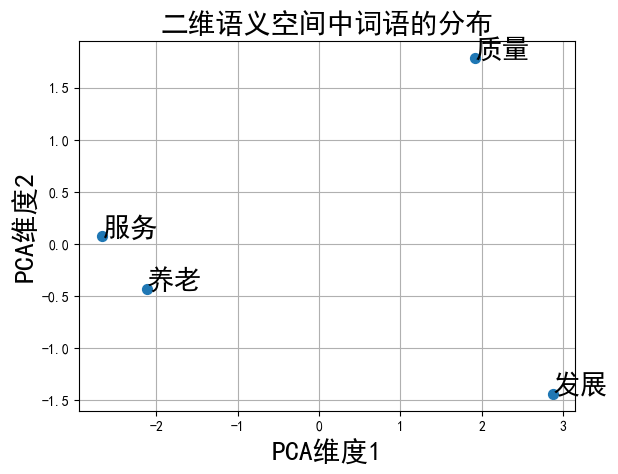

In [9]:
# 可视化

words = ['养老', '服务', '质量', '发展']
vectors = [model.wv[word] for word in words]

from sklearn.decomposition import PCA     # 语义空间降维，用于展示词语在二维空间的相对位置

# 使用PCA进行降维
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(vectors)

import matplotlib.pyplot as plt     # 画图

# 绘制四个词语在二维空间的相对位置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure()

# 取PCA降维结果中所有行的第一列和第二列数据绘制散点图，设置点的大小为50
plt.scatter(pca_result[:, 0], pca_result[:, 1], s = 50)

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]), fontsize = 20)

plt.xlabel('PCA维度1', fontsize = 20)
plt.ylabel('PCA维度2', fontsize = 20)
plt.title('二维语义空间中词语的分布', fontsize = 20)
plt.grid(True)
plt.show()